<img src="mioti.png" style="height: 100px">
<center style="color:#888">Data Science with Python</center>

# DSPy5. Pandas IoT I

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Pandas and time series

Serie temporal: cualquer fenomeno observado múltiples veces a lo largo del tiempo -> ¡Todos los datos de sensorización tienen una marca temporal! 

Un ejemplo sería el siguiente dataset de OCHA (Regional Office for West and Central Africa), que registró diariamente, entre 2014 y 2015 las muertes por Ébola en África.

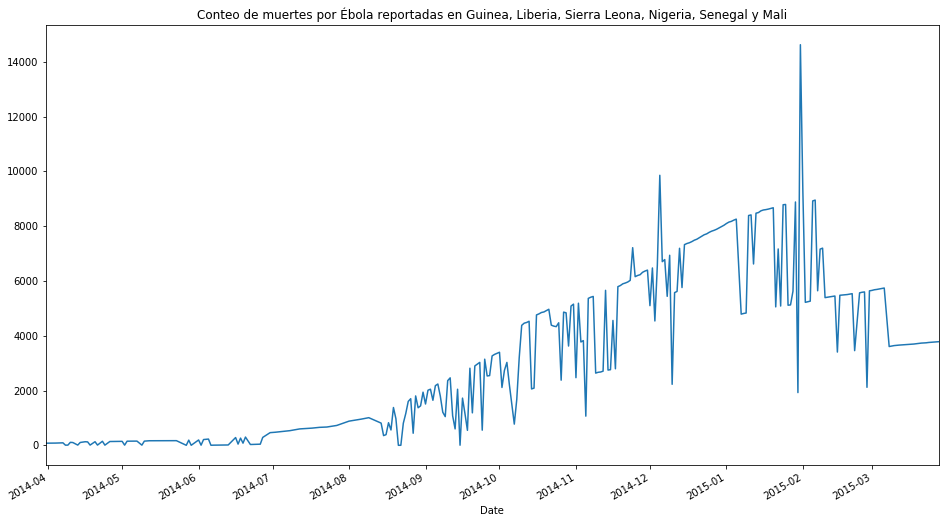

In [2]:
pd.options.mode.chained_assignment = None

ebola_data_from_file = pd.read_excel('data-ebola-public.xlsx', sheet_name=1)
ebola_data = ebola_data_from_file.set_index(['Date'])
ebola_deaths_data = ebola_data[
    (ebola_data['Category'] == 'Deaths') & 
    (ebola_data['Localite'] == 'National')
]
ebola_deaths_data['Value'] = pd.to_numeric(ebola_deaths_data['Value'], errors='coerce')
ebola_deaths_data = ebola_deaths_data.groupby('Date')['Value'].sum()
ebola_deaths_data.plot(
    title="Conteo de muertes por Ébola reportadas en Guinea, Liberia, Sierra Leona, Nigeria, Senegal y Mali",
    figsize=(16,9)
)
pd.options.mode.chained_assignment = 'warn'


### Python datetimes
Empezamos con un respaso de cómo se tratan las fechas con Python: con `datetime`

In [3]:
from datetime import datetime
my_birthday = datetime(1987, 2, 27)
my_birthday

datetime.datetime(1987, 2, 27, 0, 0)

In [4]:
datetime?

Init signature: datetime(self, /, *args, **kwargs)
Docstring:     
datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])

The year, month and day arguments are required. tzinfo may be None, or an
instance of a tzinfo subclass. The remaining arguments may be ints.
File:           /opt/anaconda3/lib/python3.7/datetime.py
Type:           type
Subclasses:     _Timestamp, _NaT


Podemos realizar operaciones con estos objetos:

In [5]:
the_day_after_my_birthday = datetime(1987, 2, 26)
my_birthday - the_day_after_my_birthday

datetime.timedelta(days=1)

Cuando leamos los datos de una fuente (o los escribamos), necesitamos _serializar_ estos objetos, es decir, convertir de string... donde ese string puede estar en formatos muy distintos (e.g., "27/02/1987" vs. "1987-02-27"). El formato de la conversión de str a datetime lo podemos especificar de manera explícita:

In [6]:
date_str = '1987-02-27'
datetime.strptime(date_str, '%Y-%m-%d')

datetime.datetime(1987, 2, 27, 0, 0)

O implícita:

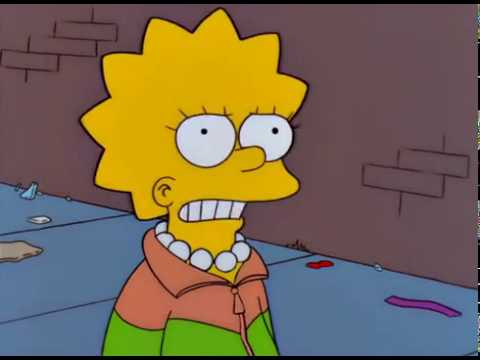

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo('hbzV4DgS47c')

In [8]:
from dateutil.parser import parse
parse('1987-02-27')

datetime.datetime(1987, 2, 27, 0, 0)

Y esta inferencia es la que hacen la mayoría de los read_* de Pandas, y que Pandas implementa para sus tipos de datos con `to_datetime`:
    


In [9]:
s = pd.Series(['1987-02-27', '1987-02-26'])
s

0    1987-02-27
1    1987-02-26
dtype: object

In [10]:
pd.to_datetime(s)

0   1987-02-27
1   1987-02-26
dtype: datetime64[ns]

In [11]:
pd.to_datetime?

Signature:
pd.to_datetime(
    arg,
    errors='raise',
    dayfirst=False,
    yearfirst=False,
    utc=None,
    box=True,
    format=None,
    exact=True,
    unit=None,
    infer_datetime_format=False,
    origin='unix',
    cache=True,
)
Docstring:
Convert argument to datetime.

Parameters
----------
arg : integer, float, string, datetime, list, tuple, 1-d array, Series

    .. versionadded:: 0.18.1

       or DataFrame/dict-like

errors : {'ignore', 'raise', 'coerce'}, default 'raise'

    - If 'raise', then invalid parsing will raise an exception
    - If 'coerce', then invalid parsing will be set as NaT
    - If 'ignore', then invalid parsing will return the input
dayfirst : boolean, default False
    Specify a date parse order if `arg` is str or its list-likes.
    If True, parses dates with the day first, eg 10/11/12 is parsed as
    2012-11-10.
    with day first (this is a known bug, based on dateutil behavior).
yearfirst : boolean, default False
    Specify a date parse or

### Pandas and dates
En la mayoría de los casos, tendremos suerte y Pandas automáticamente reconocerá el tipo de dato correcto para las columnas con fechas:

In [12]:
ebola_data_from_file.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58635 entries, 0 to 58634
Data columns (total 7 columns):
Country     58635 non-null object
Localite    58635 non-null object
Category    58635 non-null object
Value       58217 non-null object
Date        58635 non-null datetime64[ns]
Sources     58635 non-null object
Link        58451 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 3.1+ MB


Y al seleccionar esa columna como índice, obtenemos un índice especial `DatetimeIndex`:

In [13]:
ebola_data.index

DatetimeIndex(['2014-03-24', '2014-03-24', '2014-03-25', '2014-03-25',
               '2014-03-26', '2014-03-26', '2014-03-27', '2014-03-27',
               '2014-03-28', '2014-03-28',
               ...
               '2015-03-28', '2015-03-28', '2015-03-28', '2015-03-28',
               '2015-03-28', '2015-03-28', '2015-03-28', '2015-03-28',
               '2015-03-28', '2015-03-28'],
              dtype='datetime64[ns]', name='Date', length=58635, freq=None)

Cuyos elementos son `Timestamp`:

In [14]:
ebola_data.index[0]

Timestamp('2014-03-24 00:00:00')

Que se pueden usar allá donde se puede usar un `datetime`, pero que además tienen más funcionalidad (no vamos a entrar en ellos aquí).

Podemos hacer indexing y slicing de las time series con strings, datetimes y timestamps.

In [15]:
ebola_data['2015-01': '2015-03']

,Country,Localite,Category,Value,Sources,Link
Date,,,,,,
2015-01-01,Sierra Leone,Bo,New cases,1,Gvt,http://health.gov.sl/wp-content/uploads/2014/1...
2015-01-01,Sierra Leone,Bombali,New cases,0,Gvt,http://health.gov.sl/wp-content/uploads/2014/1...
2015-01-01,Sierra Leone,Bonthe,New cases,0,Gvt,http://health.gov.sl/wp-content/uploads/2014/1...
2015-01-01,Sierra Leone,Kailahun,New cases,0,Gvt,http://health.gov.sl/wp-content/uploads/2014/1...
2015-01-01,Sierra Leone,Kambia,New cases,1,Gvt,http://health.gov.sl/wp-content/uploads/2014/1...
...,...,...,...,...,...,...
2015-03-28,Sierra Leone,Pujehun,Deaths,21,Gvt,http://health.gov.sl/wp-content/uploads/2015/0...
2015-03-28,Sierra Leone,Tonkolili,Deaths,185,Gvt,http://health.gov.sl/wp-content/uploads/2015/0...
2015-03-28,Sierra Leone,Western area rural,Deaths,520,Gvt,http://health.gov.sl/wp-content/uploads/2015/0...


### Naive and timezone aware objects

Algo que es un poco doloroso es lidiar con operaciones relacionadas con el tiempo si nuestro proyecto tiene información de zonas horarias diferentes. ¿Cómo comparar cuanto tiempo ha pasado desde las 13:00h en España hasta las 17:00h en EEUU? Por fortuna, no tenemos que implementar nosotros manualmente las conversiones requeridas para comparar: esto sería muy compicado, teniendo en cuenta que esa diferencia horaria entre zonas cambia según el momento del año en que estemos (Daylight Saving Time), e incluso ha cambiado a lo largo de la historia.

Por defecto, tanto en Python como en Pandas, los objetos de tiempo son "naive" (tontísimos): no tienen información alguna sobre zona horaria, pero pueden tenerla y el módulo `pytz` es el que nos ayuda con eso.

In [16]:
now = datetime.now()
now

datetime.datetime(2020, 3, 19, 11, 22, 53, 521926)

In [17]:
import pytz
mad_tz = pytz.timezone('Europe/Madrid')
mad_tz.localize(now)

datetime.datetime(2020, 3, 19, 11, 22, 53, 521926, tzinfo=<DstTzInfo 'Europe/Madrid' CET+1:00:00 STD>)

Una vez hecho esto, podemos convertir tranquilamente:

In [18]:
utc_tz = pytz.timezone('UTC')
now.astimezone(utc_tz)

datetime.datetime(2020, 3, 19, 10, 22, 53, 521926, tzinfo=<UTC>)

En el caso de Pandas, dotamos de información sobre zona horaria con `tz_localize`:


In [19]:
date_index = pd.date_range('27/02/1987 9:30', periods=7, freq='D')
ts = pd.Series(np.random.randn(len(date_index)), index=date_index)
ts

1987-02-27 09:30:00    0.948795
1987-02-28 09:30:00   -2.598113
1987-03-01 09:30:00    1.062875
1987-03-02 09:30:00   -0.828527
1987-03-03 09:30:00   -1.680902
1987-03-04 09:30:00   -0.674137
1987-03-05 09:30:00   -1.266069
Freq: D, dtype: float64

In [20]:
ts = ts.tz_localize('Europe/Madrid')
ts

1987-02-27 09:30:00+01:00    0.948795
1987-02-28 09:30:00+01:00   -2.598113
1987-03-01 09:30:00+01:00    1.062875
1987-03-02 09:30:00+01:00   -0.828527
1987-03-03 09:30:00+01:00   -1.680902
1987-03-04 09:30:00+01:00   -0.674137
1987-03-05 09:30:00+01:00   -1.266069
Freq: D, dtype: float64

In [21]:
ts.tz_convert('Europe/London')

1987-02-27 08:30:00+00:00    0.948795
1987-02-28 08:30:00+00:00   -2.598113
1987-03-01 08:30:00+00:00    1.062875
1987-03-02 08:30:00+00:00   -0.828527
1987-03-03 08:30:00+00:00   -1.680902
1987-03-04 08:30:00+00:00   -0.674137
1987-03-05 08:30:00+00:00   -1.266069
Freq: D, dtype: float64

#### Operaciones

* Podemos realizar operaciones tranquilamente entre series con distintas zonas horarias: internamente todas las fechas están guardadas en UTC (y al hacer la operación, el resultado estará automáticamente en UTC).

* Las operaciones con los offsets de Pandas respetan las transiciones de horarios de invierno/verano

In [22]:
summer_time = pd.Timestamp('27/10/2019 01:00', tz='Europe/Madrid')
summer_time

Timestamp('2019-10-27 01:00:00+0200', tz='Europe/Madrid')

In [23]:
from pandas.tseries.offsets import Hour
summer_time + Hour()

Timestamp('2019-10-27 02:00:00+0200', tz='Europe/Madrid')

La magia viene aquí. Este año el horario de verano termino a las 03:00 del 27/10/2019:

In [24]:
summer_time + 2 * Hour()

Timestamp('2019-10-27 02:00:00+0100', tz='Europe/Madrid')

Also...

In [34]:
to_winter_time = pd.date_range('27/10/2019 00:00', periods=6, freq='H')
to_winter_time

DatetimeIndex(['2019-10-27 00:00:00', '2019-10-27 01:00:00',
               '2019-10-27 02:00:00', '2019-10-27 03:00:00',
               '2019-10-27 04:00:00', '2019-10-27 05:00:00'],
              dtype='datetime64[ns]', freq='H')

In [31]:
to_winter_time.tz_localize('Europe/Madrid')

AmbiguousTimeError: Cannot infer dst time from %r, try using the 'ambiguous' argument

### Resampling

En ocasiones querremos cambiar la frecuencia de las muestras de la serie temporal (p. ej., porque queremos reportar la información en intervalos regulares o cuando vamos a hacer feature engineering). Podemos hacerlo facilmente con `resample`:

`+` Función de agregación si vamos a una frecuencia menor (o periodo mayor) -> _downsampling_

In [40]:
ebola_deaths_data

Date
2014-03-31      80.0
2014-04-01      83.0
2014-04-04      86.0
2014-04-07      95.0
2014-04-08      10.0
               ...  
2015-03-24    3758.0
2015-03-25    3763.0
2015-03-26    3772.0
2015-03-27    3778.0
2015-03-28    3786.0
Name: Value, Length: 282, dtype: float64

In [41]:
ebola_deaths_data.resample('M').mean()

Date
2014-03-31      80.000000
2014-04-30      79.882353
2014-05-31     112.250000
2014-06-30     149.235294
2014-07-31     605.222222
2014-08-31     974.045455
2014-09-30    1979.333333
2014-10-31    3796.366667
2014-11-30    4737.700000
2014-12-31    6945.516129
2015-01-31    7425.258065
2015-02-28    5720.814815
2015-03-31    4185.880000
Freq: M, Name: Value, dtype: float64

`+` Función de rellenado si vamos a una frecuencia mayor (o períodos más cortos) -> _upsampling_

In [42]:
ebola_deaths_data.resample('H').ffill()

Date
2014-03-31 00:00:00      80.0
2014-03-31 01:00:00      80.0
2014-03-31 02:00:00      80.0
2014-03-31 03:00:00      80.0
2014-03-31 04:00:00      80.0
                        ...  
2015-03-27 20:00:00    3778.0
2015-03-27 21:00:00    3778.0
2015-03-27 22:00:00    3778.0
2015-03-27 23:00:00    3778.0
2015-03-28 00:00:00    3786.0
Freq: H, Name: Value, Length: 8689, dtype: float64

De la documentación de `fillna`, posibles funciones de rellenado: 
> {‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None
> Method to use for filling holes in reindexed Series: 
> * pad / ffill: propagate last valid observation forward to next valid 
> * backfill / bfill: use next valid observation to fill gap

También puede simplemente usarse `asfreq()` para dejar los huecos como NaNs

### Moving window functions

Por último también existen operadores para aplicar funciones en ventanas deslizantes (que también se suelen usar como valores en modelos de predicción). Un caso típico es la media, para quedarse con la tendencia de una serie temporal (suavizado):

Vamos a usar un widget interactivo por primera vez. Vamos a chequear si es neceario instalarlo, y, si no esta instalado, lo instalaremos:

In [43]:
try:
    from ipywidgets import interact, widgets
    
except:
    import sys 
    !conda install --yes --prefix {sys.prefix} -c conda-forge ipywidgets


In [44]:
%matplotlib notebook

fig = plt.figure(num="Muertes por Ébola en Guinea, Liberia, Sierra Leona, Nigeria, Senegal y Mali")
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(
    ebola_deaths_data.index, 
    ebola_deaths_data.values,
)

def update(w = 1):
    rolling = ebola_deaths_data.rolling(w, min_periods=1).mean()
    line.set_xdata(rolling.index)
    line.set_ydata(rolling.values)
    fig.canvas.draw_idle()

interact(update, w=widgets.IntSlider(min=1, max=60, step=1, value=1));

<IPython.core.display.Javascript object>

interactive(children=(IntSlider(value=1, description='w', max=60, min=1), Output()), _dom_classes=('widget-int…